In [1]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 907 kB 6.6 MB/s 


In [2]:
import warnings
import numpy as np
import pandas as pd
from random import gauss
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/Daily_Electricity_Consumption.csv')

In [5]:
data.head()

,Date,usage,cost
0,2016-10-22,4.52,0.60
1,2016-10-23,23.32,4.36
2,2016-10-24,7.16,1.20
3,2016-10-25,8.68,1.60
4,2016-10-26,5.04,0.84


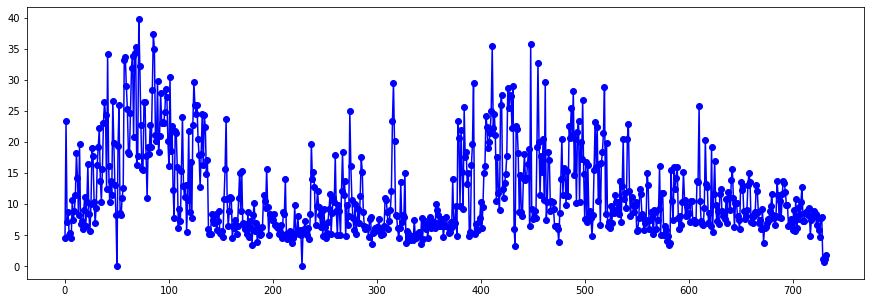

In [6]:
plt.figure(figsize=(15,5))
plt.plot(data.usage, marker='o', color='b')
plt.show()

Here we can find it difficult to visualize many thing so we limit the time period for visualisation

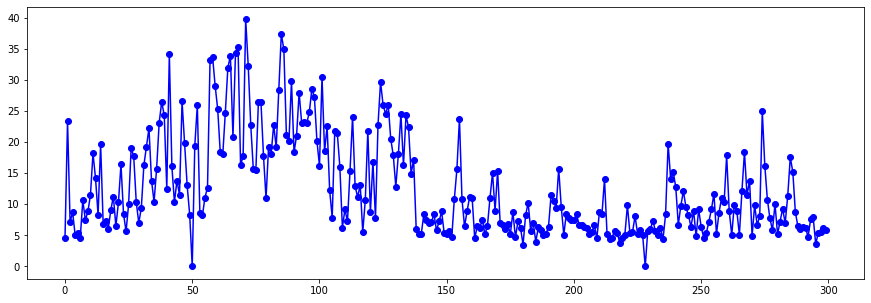

In [7]:
data1 = data[:300]
plt.figure(figsize=(15,5))
plt.plot(data1.usage, marker='o', color='b')
plt.show()

We can observe from the plots that there are not many fluctuations in the data.

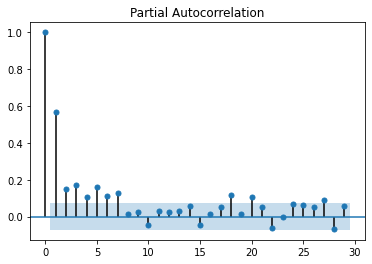

In [8]:
plot_pacf(data.usage**2)
plt.show()

In [9]:
model = arch_model(data['usage'], p=1, q=7)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 6586902.122217481
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2911.6625603673965
Iteration:      3,   Func. Count:     38,   Neg. LLF: 60050.23549556921
Iteration:      4,   Func. Count:     50,   Neg. LLF: 3070.8562398391914
Iteration:      5,   Func. Count:     63,   Neg. LLF: 2398.240240539942
Iteration:      6,   Func. Count:     75,   Neg. LLF: 2396.557202027726
Iteration:      7,   Func. Count:     87,   Neg. LLF: 2393.577721476678
Iteration:      8,   Func. Count:     99,   Neg. LLF: 2334.1405766934668
Iteration:      9,   Func. Count:    111,   Neg. LLF: 2345.831187454402
Iteration:     10,   Func. Count:    123,   Neg. LLF: 2310.3206538331333
Iteration:     11,   Func. Count:    135,   Neg. LLF: 2307.9221908856316
Iteration:     12,   Func. Count:    146,   Neg. LLF: 2310.1702430911755
Iteration:     13,   Func. Count:    158,   Neg. LLF: 2334.2082242758156
Iteration:     14,   Func. Count:    170,   Neg. LLF: 230

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  usage   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2306.29
Distribution:                  Normal   AIC:                           4632.57
Method:            Maximum Likelihood   BIC:                           4678.54
                                        No. Observations:                  733
Date:                Mon, Dec 05 2022   Df Residuals:                      732
Time:                        06:50:29   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             8.8064      0.590     14.919  2.491e-50 [  7.649,  9.963]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.9842     11.211      0.177      0.860 [-19.990, 23.958]
alpha[1]       0.4270      2.059      0.207      0.836 [ -3.609,  4.463]
beta[1]        0.2162      3.407  6.346e-02      0.949 [ -6.461,  6.893]
beta[2]        0.0000      3.194      0.000      1.000 [ -6.259,  6.259]
beta[3]        0.0000      1.930      0.000      1.000 [ -3.782,  3.782]
beta[4]        0.0651      2.809  2.320e-02      0.981 [ -5.440,  5.570]
beta[5]        0.1463      0.891      0.164      0.870 [ -1.601,  1.894]
beta[6]        0.1280      2.673  4.790e-02      0.962 [ -5.110,  5.366]
beta[7]        0.0000      4.257      0.000      1.000 [ -8.343,  8.343]
========================================================================

Covariance estimator: robust
"""

In [10]:
rollingPredictions = []
test_size = 5

In [11]:
for i in range(test_size):
    train = data.usage[:-(test_size-i)]
    model = arch_model(train, p=1, q=7)
    model_fit = model.fit(disp = 'off')
    pred = model_fit.forecast(horizon = 1)
    rollingPredictions.append(np.sqrt(pred.variance.values[-1:][0]))

In [12]:
rollingPredictions = pd.Series(rollingPredictions, index = data.usage.index[-test_size:])

In [13]:
rollingPredictions

728     [2.581339186959021]
729      [2.32467555297195]
730     [5.547481064266866]
731     [6.328679509385552]
732    [6.2364665393076955]
dtype: object

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error

def timeseries_evaluation_metrics_func(y_true, y_pred):
    print('Evaluation metric results:-')
    print(f'MSE is : {mean_squared_error(y_true, y_pred)}')  
    print(f'MAE is : {mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {mean_squared_error(y_true, y_pred,squared=False)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') 
    print(f'R2 is : {r2_score(y_true, y_pred)}',end='\n\n')

In [15]:
timeseries_evaluation_metrics_func(data.usage[-test_size:],rollingPredictions)

Evaluation metric results:-
MSE is : 19.966347097161247
MAE is : 4.195192695794608
RMSE is : 4.46837186200536
MAPE is : 3.1885868367775068
R2 is : -1.6542861199389511



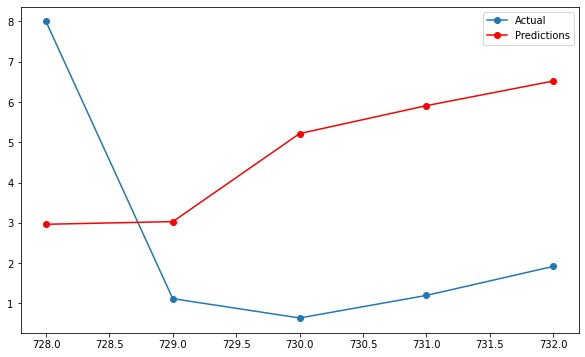

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data.usage[-test_size:], marker = 'o')
plt.plot(rollingPredictions, color='r', marker='o')
plt.legend(['Predictions', 'Actual'][::-1], loc = 'best')
plt.show()